In [1]:
import tensorflow as tf
import pandas as pd 

In [2]:
genderd = pd.read_csv('Transformed Data Set - Sheet1.csv')
genderd

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [3]:
genderd.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [4]:
genderd

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [5]:
gender = genderd

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# for column in data.columns:
    # le = LabelEncoder()
    # data[column] = le.fit_transform(data[column])
    
label_encoders = {}
for column in gender.columns:
    gender[column] = label_encoder.fit_transform(gender[column])
    label_encoders[column] = label_encoder
    print(label_encoder)
gender

LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()
LabelEncoder()


,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0
...,...,...,...,...,...
61,0,6,3,1,1
62,0,2,0,1,1
63,1,2,1,2,1
64,0,6,5,1,1


In [7]:

from sklearn.model_selection import train_test_split
X  = gender
X = X.drop(columns=['Gender'])
y = gender.drop(columns=['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink'])
y.columns
# genderd.columns

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=y)

In [8]:
gender.shape

(66, 5)

In [9]:
genderd

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0
...,...,...,...,...,...
61,0,6,3,1,1
62,0,2,0,1,1
63,1,2,1,2,1
64,0,6,5,1,1


In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

# model.add(tf.keras.layers.Dense(512,activation='relu'))

In [11]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [12]:
model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test))

Epoch 1/15
2/2 [==============================] - 2s 277ms/step - loss: 0.9746 - accuracy: 0.4615 - val_loss: 0.7047 - val_accuracy: 0.3571
Epoch 2/15
2/2 [==============================] - 0s 30ms/step - loss: 0.5472 - accuracy: 0.7500 - val_loss: 0.7178 - val_accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 13ms/step - loss: 0.5224 - accuracy: 0.7500 - val_loss: 0.7063 - val_accuracy: 0.5714
Epoch 4/15
2/2 [==============================] - 0s 16ms/step - loss: 0.3543 - accuracy: 0.7885 - val_loss: 0.6850 - val_accuracy: 0.6429
Epoch 5/15
2/2 [==============================] - 0s 16ms/step - loss: 0.3325 - accuracy: 0.8462 - val_loss: 0.6789 - val_accuracy: 0.6429
Epoch 6/15
2/2 [==============================] - 0s 31ms/step - loss: 0.3340 - accuracy: 0.8077 - val_loss: 0.6782 - val_accuracy: 0.6429
Epoch 7/15
2/2 [==============================] - 0s 31ms/step - loss: 0.2962 - accuracy: 0.8654 - val_loss: 0.6799 - val_accuracy: 0.6429
Epoch 8/15
2/2 [==========

In [13]:
# model.evaluate(X_test,y_test,batch_size=64)

In [14]:
# print(model.history.history['loss'])

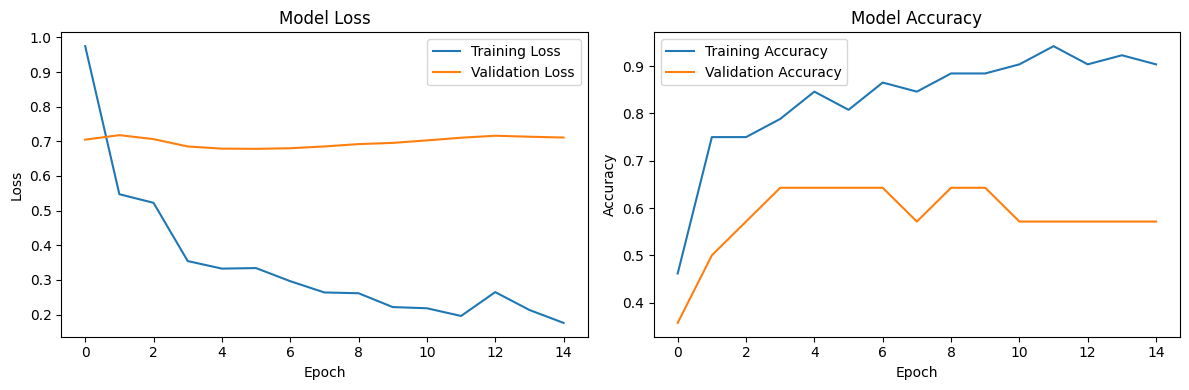

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Output the model's training accuracy
training_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {training_accuracy}")

Training Accuracy: 0.9615384615384616


C:\Users\DELL\AppData\Local\Temp\ipykernel_16396\2932954577.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [17]:
gender.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [18]:
real_data = pd.DataFrame({
    'Favorite Color': ['0'],
    'Favorite Music Genre': ['2'],
    'Favorite Beverage': ['0'],
    'Favorite Soft Drink': ['1']
})
print(label_encoders)
# for column in real_data.columns:
#     le = label_encoders[column]
#     real_data[column] = le.transform(real_data[column])

print("Encoded Real Data:")
real_data

{'Favorite Color': LabelEncoder(), 'Favorite Music Genre': LabelEncoder(), 'Favorite Beverage': LabelEncoder(), 'Favorite Soft Drink': LabelEncoder(), 'Gender': LabelEncoder()}
Encoded Real Data:


,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
0,0,2,0,1


In [19]:
genderd

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0
...,...,...,...,...,...
61,0,6,3,1,1
62,0,2,0,1,1
63,1,2,1,2,1
64,0,6,5,1,1


In [20]:
# Predict the class for the new data
prediction = model.predict(real_data)

# Decode the prediction to get the original class label
# predicted_gender = label_encoder['Gender'].inverse_transform(prediction)

print(f"Predicted Gender: {prediction}")


Predicted Gender: [1]
